In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
plt.rcParams.update({'font.size': 14})
from scipy.stats import linregress
from scipy.stats import pearsonr, spearmanr
from scipy.stats import ranksums
from scipy.stats import ttest_ind
from scipy.spatial import distance
from glob import glob
from sklearn.metrics import mean_squared_error

In [2]:
#pd.set_option('display.max_columns', None)
#pd.set_option("max_rows", None)

In [3]:
#load info
Patient_Info = pd.read_csv('/Users/dawonchoi/Documents/HKUST/Y3/Summer/UROP 2200/Initial Recurrence/initial_info.csv', index_col=0)

In [4]:
#load initial file
Initial_relative = pd.read_table('/Users/dawonchoi/Documents/HKUST/Y3/Summer/UROP 2200/Initial Recurrence/initial_relative.txt', index_col=0)
Initial_relative.index = Initial_relative.index.map(lambda x: str(x)[:-2])

In [5]:
#load recurrence file
Recurrence_relative = pd.read_table('/Users/dawonchoi/Documents/HKUST/Y3/Summer/UROP 2200/Initial Recurrence/recurrence_relative.txt', index_col=0)
Recurrence_relative.index = Recurrence_relative.index.map(lambda x: str(x)[:-2])

In [6]:
#load info
initial_gene = pd.read_csv('/Users/dawonchoi/Documents/HKUST/Y3/Summer/UROP 2200/Initial Recurrence/pairedGlioma.initial.expression.protein_cod.log2RPKM.txt', sep='\t', index_col=0)
initial_gene = initial_gene.T
initial_gene.index = initial_gene.index.map(lambda x: str(x)[:-2])
initial_gene

,A1BG,A1CF,A2M,A2ML1,A3GALT2,A4GALT,A4GNT,AAAS,AACS,AADAC,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
PS001,0.322194,0.000887,8.474165,0.214947,0.354009,1.230164,0.155758,3.490316,1.316954,0.055590,...,2.548419,2.847793,2.126169,2.360479,2.725091,0.040484,4.011957,6.530712,3.339430,3.409634
PS002,0.046524,0.020182,7.932872,0.115775,1.047151,0.832239,0.282275,2.944802,1.235938,0.006160,...,2.535253,3.057632,1.887034,2.408481,3.099876,0.127986,4.178815,7.396621,3.445534,3.510258
PS003,0.069776,0.073363,7.432975,0.579277,0.503432,0.877112,0.081326,3.499517,0.991083,0.001362,...,1.810134,1.763021,2.187577,2.392960,3.566120,0.031058,3.735626,6.360853,3.919491,3.493802
PS004,0.087898,0.009340,7.992288,0.802002,0.255035,1.878284,0.030338,3.210685,0.885269,0.000094,...,0.550298,1.104706,2.196133,2.270942,3.484471,0.626191,3.769631,7.361941,3.571827,2.632745
PS005,0.359374,0.064059,7.968155,0.865592,0.184223,0.378405,0.077970,3.063487,0.973098,0.043815,...,2.305857,2.387947,2.290157,2.178121,2.983156,0.112762,4.509771,6.847077,3.224891,3.470250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PSX08,0.140245,0.038351,6.812783,1.405271,0.167836,1.118234,0.051918,3.018705,1.391969,0.001851,...,1.332148,1.690496,1.486260,2.330306,2.592944,0.033938,3.805096,4.630435,2.800361,2.852385
PSX07,0.288546,0.151314,5.679800,0.138256,0.689481,0.505129,0.006498,2.581349,1.514374,0.006498,...,2.871320,4.181237,1.506046,2.282706,2.869557,0.006498,3.265812,6.755331,3.363743,2.821824
PSX01,0.175047,0.003846,7.549660,1.855640,0.003846,2.714165,0.358712,3.213100,1.124916,0.139253,...,2.519610,3.470250,1.849501,2.454381,2.425886,0.089193,3.499165,5.041788,2.683307,2.748271
PSX14,0.055856,0.041085,7.261907,1.790860,0.250851,1.331037,0.087555,2.452307,1.475816,0.002259,...,1.660000,1.207815,1.375349,2.145834,2.283018,0.062606,4.266303,3.713855,2.525556,3.183371


In [7]:
#select for marker genes
initial_gene_marker = initial_gene.loc[:,["TMEM119", "SALL1", "NAV3", "P2RY12"]]
initial_gene_marker

,TMEM119,SALL1,NAV3,P2RY12
PS001,4.497868,5.572022,2.976651,6.167882
PS002,0.822076,4.759865,1.352908,2.224992
PS003,1.080119,4.753490,1.157426,2.686523
PS004,5.291875,4.517430,1.753415,3.625322
PS005,3.233365,5.454537,1.945411,4.041885
...,...,...,...,...
PSX08,4.247390,4.937512,2.682744,7.005088
PSX07,1.791211,4.532994,0.675473,2.712473
PSX01,2.133009,4.451699,2.072003,1.630528
PSX14,2.987664,4.542575,3.116623,6.514562


In [8]:
#load info
recurrence_gene = pd.read_csv('/Users/dawonchoi/Documents/HKUST/Y3/Summer/UROP 2200/Initial Recurrence/pairedGlioma.recurrence.expression.protein_cod.log2RPKM.txt', sep='\t', index_col=0)
recurrence_gene = recurrence_gene.T
recurrence_gene.index = recurrence_gene.index.map(lambda x: str(x)[:-2])
recurrence_gene_marker = recurrence_gene.loc[:,["TMEM119", "SALL1", "NAV3", "P2RY12"]]
recurrence_gene_marker

,TMEM119,SALL1,NAV3,P2RY12
PS001,2.969302,5.120512,3.268968,4.479652
PS002,3.430206,4.907675,3.343248,5.308827
PS003,4.243972,5.345704,4.358316,6.298879
PS004,2.770420,4.168975,2.514006,4.340418
PS005,1.702914,5.709050,0.533703,1.940319
...,...,...,...,...
PSX08,3.615827,5.153795,1.015674,5.064742
PSX02,2.461468,5.205926,0.540893,3.735221
PSX05,1.490648,2.697774,3.254029,2.788383
PSX13,1.516729,3.100167,1.145732,4.638126


In [9]:
#add patient info for the ones with initial data
common = initial_gene_marker.index.intersection(Patient_Info.index)
common2 = recurrence_gene_marker.index.intersection(Patient_Info.index)
final_common = recurrence_gene_marker.index.intersection(initial_gene_marker.index)
final_common

Index(['PS001', 'PS002', 'PS003', 'PS004', 'PS005', 'PS006', 'PS007', 'PS008',
       'PS009', 'PS010',
       ...
       'PSX20', 'PSX18', 'PSX01', 'PSX14', 'PSX07', 'PSX09', 'PSX08', 'PSX02',
       'PSX05', 'PSX13'],
      dtype='object', length=181)

In [10]:
combined_data = Patient_Info
combined_data = combined_data[combined_data.index.isin(final_common)]
Grade1 = combined_data.loc[:, combined_data.columns == "Grade_1"]
Grade2 = combined_data.loc[:, combined_data.columns == "Grade_2"]
grade_data = Grade1.join(Grade2)
grade_data

,Grade_1,Grade_2
Patient_ID,,
PS001,IV,IV
PS002,IV,IV
PS003,IV,IV
PS004,IV,IV
PS005,IV,IV
...,...,...
PSX15,IV,IV
PSX16,IV,IV
PSX17,IV,IV


In [11]:
select = grade_data[(grade_data['Grade_1']=="IV")&(grade_data['Grade_2']=="IV")]
grade_data.loc[select.index, 'Progression'] = "Recurrence"
select2 = grade_data[(grade_data['Grade_2']=="II")]
select3 = grade_data[(grade_data['Grade_2']=="III")]
grade_data.loc[select2.index, 'Progression'] = "No Progression"
grade_data.loc[select3.index, 'Progression'] = "No Progression"
grade_data = grade_data.fillna("Progression")
grade_data

,Grade_1,Grade_2,Progression
Patient_ID,,,
PS001,IV,IV,Recurrence
PS002,IV,IV,Recurrence
PS003,IV,IV,Recurrence
PS004,IV,IV,Recurrence
PS005,IV,IV,Recurrence
...,...,...,...
PSX15,IV,IV,Recurrence
PSX16,IV,IV,Recurrence
PSX17,IV,IV,Recurrence


In [12]:
#TMEM119
initial_gene_marker = initial_gene_marker[initial_gene_marker.index.isin(final_common)]
recurrence_gene_marker = recurrence_gene_marker[recurrence_gene_marker.index.isin(final_common)]
initial = initial_gene_marker.loc[:, initial_gene_marker.columns == "TMEM119"]
initial.columns = ['Initial']
recurrence = recurrence_gene_marker.loc[:, recurrence_gene_marker.columns == "TMEM119"]
recurrence.columns = ['Recurrent']
TMEM119_data = initial.join(recurrence)
TMEM119_data

,Initial,Recurrent
PS001,4.497868,2.969302
PS002,0.822076,3.430206
PS003,1.080119,4.243972
PS004,5.291875,2.770420
PS005,3.233365,1.702914
...,...,...
PSX13,2.312966,1.516729
PSX08,4.247390,3.615827
PSX07,1.791211,0.969526
PSX01,2.133009,3.243631


In [13]:
TMEM119_final = pd.concat([grade_data, TMEM119_data], axis=1)
TMEM119_final.index.name = 'Mixture'
TMEM119_final = TMEM119_final.drop(['Grade_1', 'Grade_2'], axis=1)
TMEM119_final = TMEM119_final.sort_values(by='Mixture')
TMEM119_final

,Progression,Initial,Recurrent
Mixture,,,
PS001,Recurrence,4.497868,2.969302
PS002,Recurrence,0.822076,3.430206
PS003,Recurrence,1.080119,4.243972
PS004,Recurrence,5.291875,2.770420
PS005,Recurrence,3.233365,1.702914
...,...,...,...
PSX15,Recurrence,1.588962,3.012429
PSX16,Recurrence,0.568673,0.734194
PSX17,Recurrence,3.823451,3.747103


In [14]:
TMEM119_mdf = pd.melt(TMEM119_final.reset_index(), id_vars=('Mixture','Progression'))
TMEM119_mdf

,Mixture,Progression,variable,value
0,PS001,Recurrence,Initial,4.497868
1,PS002,Recurrence,Initial,0.822076
2,PS003,Recurrence,Initial,1.080119
3,PS004,Recurrence,Initial,5.291875
4,PS005,Recurrence,Initial,3.233365
...,...,...,...,...
357,PSX15,Recurrence,Recurrent,3.012429
358,PSX16,Recurrence,Recurrent,0.734194
359,PSX17,Recurrence,Recurrent,3.747103
360,PSX18,Recurrence,Recurrent,2.632452


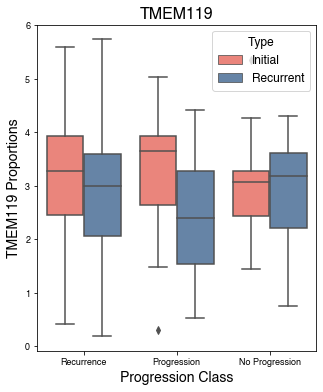

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
colors = ["#FC766AFF","#5B84B1FF"]
sns.set_palette(sns.color_palette(colors))

plt.figure(figsize=(5,6))
plt.title("TMEM119", fontsize=16)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
ax = sns.boxplot(x='Progression', y='value',hue="variable", data=TMEM119_mdf)
ax.set_xlabel("Progression Class", fontsize=14)
ax.set_ylabel("TMEM119 Proportions", fontsize=14)  
ax.legend(loc='upper right', fontsize=12,title='Type',title_fontsize=12,borderpad=.5, labelspacing=.5)

In [16]:
progression = ['Recurrence','Progression','No Progression']
for p in progression:
    specific_progression = TMEM119_mdf.loc[TMEM119_mdf['Progression'] == p]
    first = specific_progression.loc[specific_progression['variable'] == 'Initial']
    second = specific_progression.loc[specific_progression['variable'] == 'Recurrent']
    print(p)
    print('Between Initial and Recurrence: ')
    print(ranksums(first.iloc[:,3], second.iloc[:,3]))
    print ('--------------------------------')

Recurrence
Between Initial and Recurrence: 
RanksumsResult(statistic=1.956618899479025, pvalue=0.050392291303388535)
--------------------------------
Progression
Between Initial and Recurrence: 
RanksumsResult(statistic=3.661384969593269, pvalue=0.0002508554880664828)
--------------------------------
No Progression
Between Initial and Recurrence: 
RanksumsResult(statistic=0.1877810107252081, pvalue=0.851048322201759)
--------------------------------


In [17]:
#SALL1
initial_gene_marker = initial_gene_marker[initial_gene_marker.index.isin(final_common)]
recurrence_gene_marker = recurrence_gene_marker[recurrence_gene_marker.index.isin(final_common)]
initial = initial_gene_marker.loc[:, initial_gene_marker.columns == "SALL1"]
initial.columns = ['Initial']
recurrence = recurrence_gene_marker.loc[:, recurrence_gene_marker.columns == "SALL1"]
recurrence.columns = ['Recurrent']
SALL1_data = initial.join(recurrence)
SALL1_data

,Initial,Recurrent
PS001,5.572022,5.120512
PS002,4.759865,4.907675
PS003,4.753490,5.345704
PS004,4.517430,4.168975
PS005,5.454537,5.709050
...,...,...
PSX13,4.401658,3.100167
PSX08,4.937512,5.153795
PSX07,4.532994,5.160613
PSX01,4.451699,3.861757


In [18]:
SALL1_final = pd.concat([grade_data, SALL1_data], axis=1)
SALL1_final.index.name = 'Mixture'
SALL1_final = SALL1_final.drop(['Grade_1', 'Grade_2'], axis=1)
SALL1_final = SALL1_final.sort_values(by='Mixture')
SALL1_final

,Progression,Initial,Recurrent
Mixture,,,
PS001,Recurrence,5.572022,5.120512
PS002,Recurrence,4.759865,4.907675
PS003,Recurrence,4.753490,5.345704
PS004,Recurrence,4.517430,4.168975
PS005,Recurrence,5.454537,5.709050
...,...,...,...
PSX15,Recurrence,3.777276,4.243972
PSX16,Recurrence,3.981046,3.604143
PSX17,Recurrence,3.967364,4.095510


In [19]:
SALL1_mdf = pd.melt(SALL1_final.reset_index(), id_vars=('Mixture','Progression'))
SALL1_mdf

,Mixture,Progression,variable,value
0,PS001,Recurrence,Initial,5.572022
1,PS002,Recurrence,Initial,4.759865
2,PS003,Recurrence,Initial,4.753490
3,PS004,Recurrence,Initial,4.517430
4,PS005,Recurrence,Initial,5.454537
...,...,...,...,...
357,PSX15,Recurrence,Recurrent,4.243972
358,PSX16,Recurrence,Recurrent,3.604143
359,PSX17,Recurrence,Recurrent,4.095510
360,PSX18,Recurrence,Recurrent,3.993245


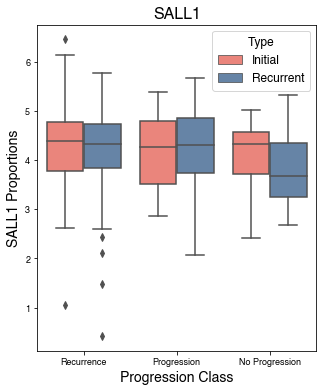

In [20]:
plt.figure(figsize=(5,6))
plt.title("SALL1", fontsize=16)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
ax = sns.boxplot(x='Progression', y='value',hue="variable", data=SALL1_mdf)
ax.set_xlabel("Progression Class", fontsize=14)
ax.set_ylabel("SALL1 Proportions", fontsize=14)  
ax.legend(loc='upper right', fontsize=12,title='Type',title_fontsize=12,borderpad=.5, labelspacing=.5)

In [21]:
progression = ['Recurrence','Progression','No Progression']
for p in progression:
    specific_progression = SALL1_mdf.loc[SALL1_mdf['Progression'] == p]
    first = specific_progression.loc[specific_progression['variable'] == 'Initial']
    second = specific_progression.loc[specific_progression['variable'] == 'Recurrent']
    print(p)
    print('Between Initial and Recurrence: ')
    print(ranksums(first.iloc[:,3], second.iloc[:,3]))
    print ('--------------------------------')

Recurrence
Between Initial and Recurrence: 
RanksumsResult(statistic=0.5064393441231045, pvalue=0.6125482605191876)
--------------------------------
Progression
Between Initial and Recurrence: 
RanksumsResult(statistic=-0.4103829037722754, pvalue=0.6815250854341361)
--------------------------------
No Progression
Between Initial and Recurrence: 
RanksumsResult(statistic=1.5491933384829666, pvalue=0.12133525035848222)
--------------------------------


In [22]:
#NAV3
initial_gene_marker = initial_gene_marker[initial_gene_marker.index.isin(final_common)]
recurrence_gene_marker = recurrence_gene_marker[recurrence_gene_marker.index.isin(final_common)]
initial = initial_gene_marker.loc[:, initial_gene_marker.columns == "NAV3"]
initial.columns = ['Initial']
recurrence = recurrence_gene_marker.loc[:, recurrence_gene_marker.columns == "NAV3"]
recurrence.columns = ['Recurrent']
NAV3_data = initial.join(recurrence)
NAV3_final = pd.concat([grade_data, NAV3_data], axis=1)
NAV3_final.index.name = 'Mixture'
NAV3_final = NAV3_final.drop(['Grade_1', 'Grade_2'], axis=1)
NAV3_final = NAV3_final.sort_values(by='Mixture')
NAV3_mdf = pd.melt(NAV3_final.reset_index(), id_vars=('Mixture','Progression'))
NAV3_mdf

,Mixture,Progression,variable,value
0,PS001,Recurrence,Initial,2.976651
1,PS002,Recurrence,Initial,1.352908
2,PS003,Recurrence,Initial,1.157426
3,PS004,Recurrence,Initial,1.753415
4,PS005,Recurrence,Initial,1.945411
...,...,...,...,...
357,PSX15,Recurrence,Recurrent,0.512772
358,PSX16,Recurrence,Recurrent,0.618369
359,PSX17,Recurrence,Recurrent,1.407102
360,PSX18,Recurrence,Recurrent,0.706977


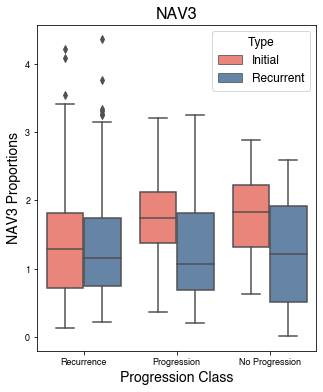

In [23]:
plt.figure(figsize=(5,6))
plt.title("NAV3", fontsize=16)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
ax = sns.boxplot(x='Progression', y='value',hue="variable", data=NAV3_mdf)
ax.set_xlabel("Progression Class", fontsize=14)
ax.set_ylabel("NAV3 Proportions", fontsize=14)  
ax.legend(loc='upper right', fontsize=12,title='Type',title_fontsize=12,borderpad=.5, labelspacing=.5)

In [24]:
progression = ['Recurrence','Progression','No Progression']
for p in progression:
    specific_progression = NAV3_mdf.loc[NAV3_mdf['Progression'] == p]
    first = specific_progression.loc[specific_progression['variable'] == 'Initial']
    second = specific_progression.loc[specific_progression['variable'] == 'Recurrent']
    print(p)
    print('Between Initial and Recurrence: ')
    print(ranksums(first.iloc[:,3], second.iloc[:,3]))
    print ('--------------------------------')

Recurrence
Between Initial and Recurrence: 
RanksumsResult(statistic=0.08901578915474363, pvalue=0.9290693620025384)
--------------------------------
Progression
Between Initial and Recurrence: 
RanksumsResult(statistic=2.699550038876999, pvalue=0.0069433313357975535)
--------------------------------
No Progression
Between Initial and Recurrence: 
RanksumsResult(statistic=2.276844755043148, pvalue=0.0227954978610983)
--------------------------------


In [25]:
#P2RY12
initial_gene_marker = initial_gene_marker[initial_gene_marker.index.isin(final_common)]
recurrence_gene_marker = recurrence_gene_marker[recurrence_gene_marker.index.isin(final_common)]
initial = initial_gene_marker.loc[:, initial_gene_marker.columns == "P2RY12"]
initial.columns = ['Initial']
recurrence = recurrence_gene_marker.loc[:, recurrence_gene_marker.columns == "P2RY12"]
recurrence.columns = ['Recurrent']
P2RY12_data = initial.join(recurrence)
P2RY12_final = pd.concat([grade_data, P2RY12_data], axis=1)
P2RY12_final.index.name = 'Mixture'
P2RY12_final = P2RY12_final.drop(['Grade_1', 'Grade_2'], axis=1)
P2RY12_final = P2RY12_final.sort_values(by='Mixture')
P2RY12_mdf = pd.melt(P2RY12_final.reset_index(), id_vars=('Mixture','Progression'))
P2RY12_mdf

,Mixture,Progression,variable,value
0,PS001,Recurrence,Initial,6.167882
1,PS002,Recurrence,Initial,2.224992
2,PS003,Recurrence,Initial,2.686523
3,PS004,Recurrence,Initial,3.625322
4,PS005,Recurrence,Initial,4.041885
...,...,...,...,...
357,PSX15,Recurrence,Recurrent,4.939961
358,PSX16,Recurrence,Recurrent,1.976412
359,PSX17,Recurrence,Recurrent,4.687606
360,PSX18,Recurrence,Recurrent,2.434876


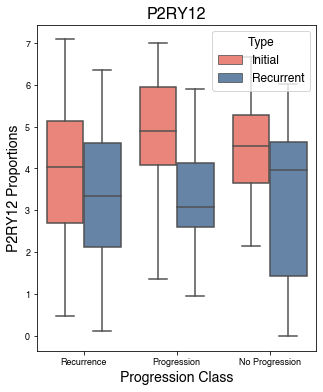

In [26]:
plt.figure(figsize=(5,6))
plt.title("P2RY12", fontsize=16)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
ax = sns.boxplot(x='Progression', y='value',hue="variable", data=P2RY12_mdf)
ax.set_xlabel("Progression Class", fontsize=14)
ax.set_ylabel("P2RY12 Proportions", fontsize=14)  
ax.legend(loc='upper right', fontsize=12,title='Type',title_fontsize=12,borderpad=.5, labelspacing=.5)

In [27]:
progression = ['Recurrence','Progression','No Progression']
for p in progression:
    specific_progression = P2RY12_mdf.loc[P2RY12_mdf['Progression'] == p]
    first = specific_progression.loc[specific_progression['variable'] == 'Initial']
    second = specific_progression.loc[specific_progression['variable'] == 'Recurrent']
    print(p)
    print('Between Initial and Recurrence: ')
    print(ranksums(first.iloc[:,3], second.iloc[:,3]))
    print ('--------------------------------')

Recurrence
Between Initial and Recurrence: 
RanksumsResult(statistic=2.8009725500050884, pvalue=0.005094885262509294)
--------------------------------
Progression
Between Initial and Recurrence: 
RanksumsResult(statistic=4.379555051194751, pvalue=1.1892187708961148e-05)
--------------------------------
No Progression
Between Initial and Recurrence: 
RanksumsResult(statistic=2.206426876021195, pvalue=0.02735412496436736)
--------------------------------
